In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


Text(0.5, 1.0, 'Class')

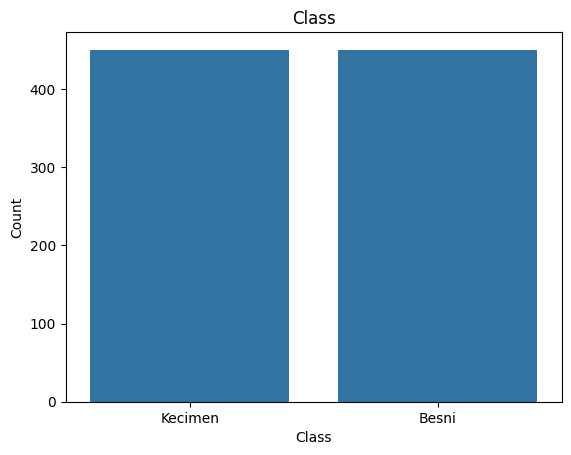

In [3]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class")

In [4]:
# 결측치 확인

df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [5]:
# 특성 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
# Class 특성 정수형으로 변경

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


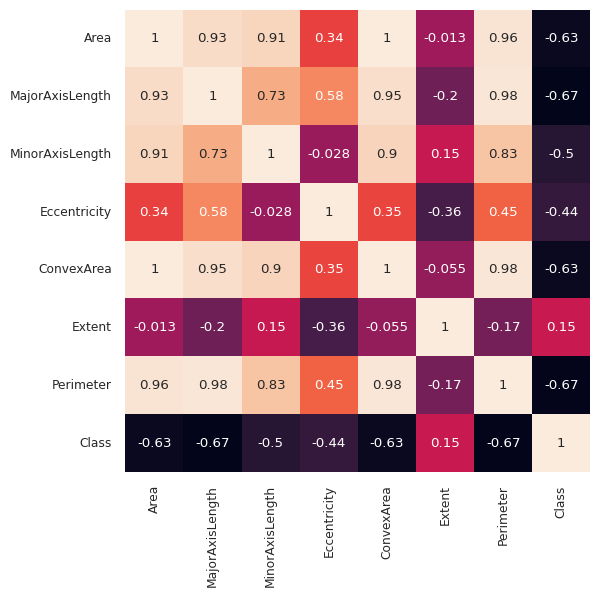

In [8]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
X=df.drop('Class',axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [10]:
y=df['Class']
y.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int64>

In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [12]:
# 원-핫 인코딩
Y = pd.get_dummies(y).values

In [13]:
X =X.values

In [14]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [15]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
X_train,X_val, y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [22]:
# 모델 생성 함수 정의

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(Dense(10, input_shape=(7,), activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(2, activation='sigmoid'))
    return model

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = model_fn()

model.compile(Adam(lr=0.04), loss ='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                80        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 2)                 42        
                                                                 
Total params: 762 (2.98 KB)
Trainable params: 762 (2.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=4,validation_data= (X_val,y_val))
y_pred = model.predict(X_val)

y_val_class = np.argmax(y_val,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
144/144 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5139 - val_loss: 0.6936 - val_accuracy: 0.4931
Epoch 2/30
144/144 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.4965 - val_loss: 0.6944 - val_accuracy: 0.4931
Epoch 3/30
144/144 [==============================] - 1s 5ms/step - loss: 0.6942 - accuracy: 0.5139 - val_loss: 0.6938 - val_accuracy: 0.4931
Epoch 4/30
144/144 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.4757 - val_loss: 0.6944 - val_accuracy: 0.4931
Epoch 5/30
144/144 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.5139 - val_loss: 0.6935 - val_accuracy: 0.4931
Epoch 6/30
144/144 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5139 - val_loss: 0.6935 - val_accuracy: 0.4931
Epoch 7/30
144/144 [==============================] - 1s 4ms/step - loss: 0.6940 - accuracy: 0.4757 - val_loss: 0.6946 - val_accuracy: 0.4931
Epoch 

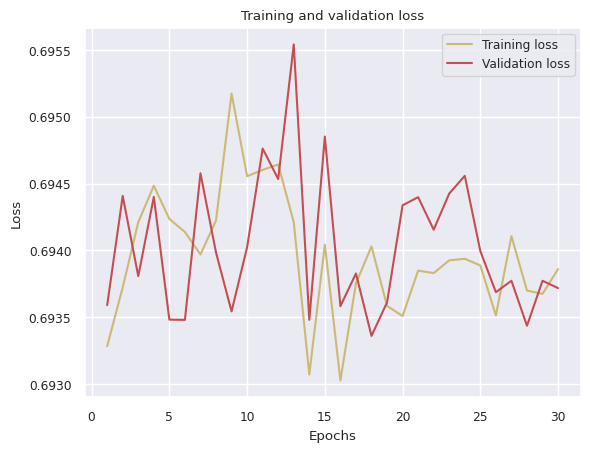

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

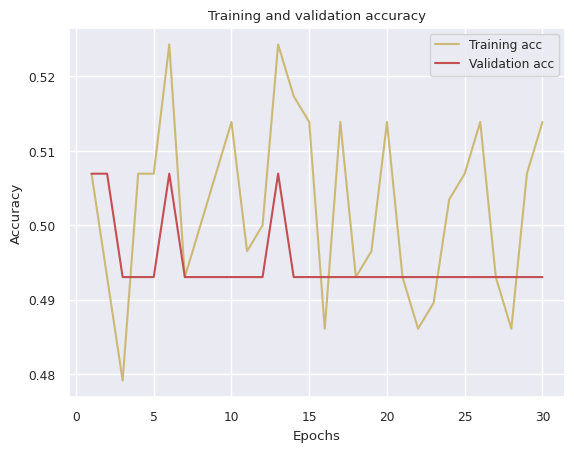

In [27]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [31]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val_class,y_pred_class))
print(confusion_matrix(y_val_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.49      1.00      0.66        71

    accuracy                           0.49       144
   macro avg       0.25      0.50      0.33       144
weighted avg       0.24      0.49      0.33       144

[[ 0 73]
 [ 0 71]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# 두 콜백을 함께 사용

model = model_fn(keras.layers.Dropout(0.3))
model.compile(Adam(learning_rate=0.05), loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
print(early_stopping_cb.stopped_epoch)

3


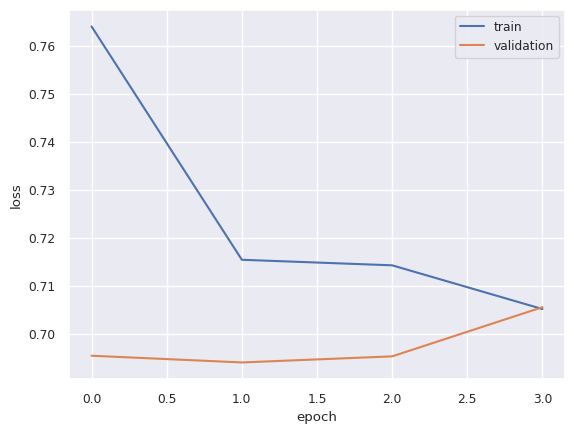

In [35]:
# 훈련 손실과 검증 손실 출력

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [38]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인

model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4931


[0.69410240650177, 0.4930555522441864]

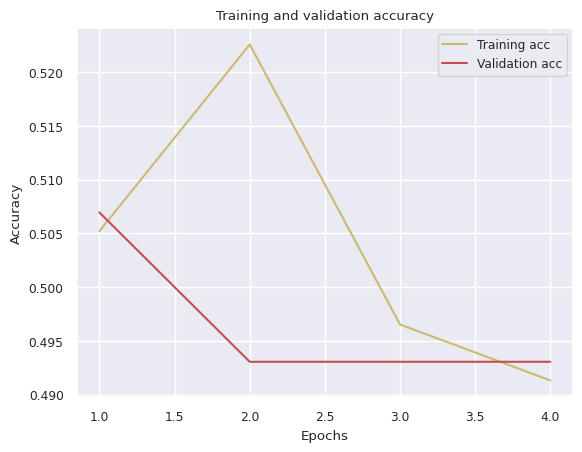

In [45]:
# 'history' 객체에서 에포크별 정보 가져오기
epochs = range(1, len(acc) + 1)

acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.4611


[0.696095883846283, 0.4611110985279083]